In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from PIL import Image

from functions import *

In [2]:
#images

#high density
im6 = Image.open('H006.tif')
im7 = Image.open('H007.tif')
im9 = Image.open('H009.tif')
im10 = Image.open('H010.tif')
im12 = Image.open('H012.tif')
im13 = Image.open('H013.tif')
im14 = Image.open('H014.tif')
im15 = Image.open('H015.tif')

#gic mutant
im20 = Image.open('gic20.tif')
im21 = Image.open('gic21.tif')
im22 = Image.open('gic22.tif')
im23 = Image.open('gic23.tif')
im24 = Image.open('gic24.tif')
im25 = Image.open('gic25.tif')
im27 = Image.open('gic27.tif')
im28 = Image.open('gic28.tif')
im29 = Image.open('gic29.tif')

#cla mutant
im30 = Image.open('cla30.tif')
im31 = Image.open('cla31.tif')
im34 = Image.open('cla34.tif')
im35 = Image.open('cla35.tif')
im36 = Image.open('cla36.tif')
im37 = Image.open('cla37.tif')

In [3]:
#df

#high density
h6 = microscopy('H6.csv',im6)
h7 = microscopy('H7.csv',im7)
h9 = microscopy('H9.csv',im9)
h10 = microscopy('H10.csv',im10)
h12 = microscopy('H12.csv',im12)
h13 = microscopy('H13.csv',im13)
h14 = microscopy('H14.csv',im14)
h15 = microscopy('H15.csv',im15)

#gic mutant
g20 = microscopy('g20.csv',im20)
g21 = microscopy('g21.csv',im21)
g22 = microscopy('g22.csv',im22)
g23 = microscopy('g23.csv',im23)
g24 = microscopy('g24.csv',im24)
g25 = microscopy('g25.csv',im25)
g27 = microscopy('g27.csv',im27)
g28 = microscopy('g28.csv',im28)
g29 = microscopy('g29.csv',im29)

#cla mutant
c30 = microscopy('c30.csv',im30)
c31 = microscopy('c31.csv',im31)
c34 = microscopy('c34.csv',im34)
c35 = microscopy('c35.csv',im35)
c36 = microscopy('c36.csv',im36)
c37 = microscopy('c37.csv',im37)

In [7]:
#df arrays

high = [h6,h7,h9,h10,h12,h13,h14,h15]
gic = [g20,g21,g22,g23,g24,g25,g27,g28,g29]
cla = [c30,c31,c34,c35,c36,c37]

dfs = [high,gic,cla]

name = ['high','gic','cla']

In [6]:
#density

hd = (np.array(im6)+np.array(im7)+np.array(im9)+np.array(im10)+np.array(im12)+np.array(im13)+np.array(im14)+np.array(im15)).sum()/8*(1200/544)**2
gd = (np.array(im20)+np.array(im21)+np.array(im22)+np.array(im23)+np.array(im24)+np.array(im25)+np.array(im27)+np.array(im28)+np.array(im29)).sum()/9*(1200/544)**2
cd = (np.array(im30)+np.array(im31)+np.array(im34)+np.array(im35)+np.array(im36)+np.array(im37)).sum()/6*(1200/544)**2

density = [hd,gd,cd]

In [8]:
#bundling

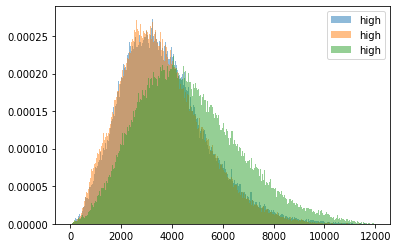

In [10]:
peak = [] #peak fluorescence

a = 0
for i in dfs:
    n = np.array([])
    for j in i:
        n = np.concatenate([n,np.array(j.TotalCross)])
    counts,edges,k = plt.hist(n,bins=np.arange(0,12000,20),label=name[a],density=True,alpha=0.5)
    peak.append(20*counts.argmax()+10)
    a += 0
plt.legend(loc=0);

In [23]:
#orientation alignment

In [11]:
#high density new
align6 = alignmentM(h6,100000)
align7 = alignmentM(h7,100000)
align9 = alignmentM(h9,100000)
align10 = alignmentM(h10,100000)
align12 = alignmentM(h12,100000)
align13 = alignmentM(h13,100000)
align14 = alignmentM(h14,100000)
align15 = alignmentM(h15,100000)
#gic
align20 = alignmentM(g20,100000)
align21 = alignmentM(g21,100000)
align22 = alignmentM(g22,100000)
align23 = alignmentM(g23,100000)
align24 = alignmentM(g24,100000)
align25 = alignmentM(g25,100000)
align27 = alignmentM(g27,100000)
align28 = alignmentM(g28,100000)
align29 = alignmentM(g29,100000)
#cla
align30 = alignmentM(c30,100000)
align31 = alignmentM(c31,100000)
align34 = alignmentM(c34,100000)
align35 = alignmentM(c35,100000)
align36 = alignmentM(c36,100000)
align37 = alignmentM(c37,100000)

In [12]:
highA = pd.concat([align6,align7,align9,align10,align12,align13,align14,align15]).sort_values(by=['r'])
gicA = pd.concat([align20,align21,align22,align23,align24,align25,align27,align28,align29]).sort_values(by=['r'])
claA = pd.concat([align30,align31,align34,align35,align36,align37]).sort_values(by=['r'])

alignments = [highA,gicA,claA]

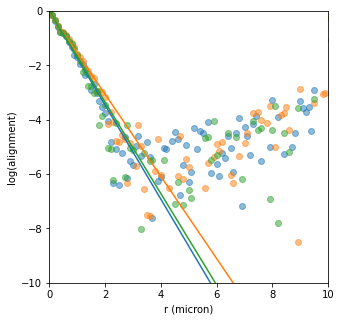

In [13]:
#nematic correlation length

nematic = []
bn = []
cin = []

plt.figure(figsize=(5,5))
for i in alignments:
    
    #scatter graph
    y0 = i.groupby('r')['align'].mean() #groupby r
    idx0 = y0[y0>0].index #find all indices in which alignment is positive
    y1 = np.log(y0[idx0]) #take log of all those positive alignment
    plt.scatter(idx0,y1,alpha=0.5) #graph log(align) vs r
    
    #compute fit
    y2 = i.groupby('r')['align'].mean().head(14) #change 38 (1.2 micron) to change range at which we fit the function
    idx1 = y2[y2>0].index
    y = np.log(y2[idx1])
    p,cov = np.polyfit(idx1,y,1,cov=True) #fit first degree polynomial by the first 14 points
    
    #graph fitted curve
    x = np.array([0,10])
    plt.plot(x,p[0]*x+p[1]) #plot fit
    
    #document data  
    nematic.append(-1/p[0]) #nematic = -1/slope
    bn.append(p[1]) #y = mx + b. b value
    cin.append(2*np.sqrt(cov[0][0]/len(idx1))) #95% CI = 2*SE = 2*SD/sqrt(n) = 2*sqrt(variance/n)
    
plt.xlim(left=0,right=10)
plt.ylim(bottom=-10,top=0)

plt.xlabel('r (micron)')
plt.ylabel('log(alignment)');

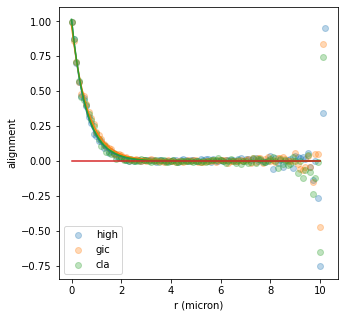

In [15]:
#alignment vs r

plt.figure(figsize=(5,5))
a = 0
x = np.linspace(0,10,100)
for i in alignments:
    plt.scatter(i.r.unique(),i.groupby('r')['align'].mean(),label=name[a],alpha=0.3)
    plt.plot(x,np.e**(-x/nematic[a]+bn[a]))
    a += 1
plt.legend(loc=0)
plt.xlabel('r (micron)')
plt.ylabel('alignment')
plt.plot([0,10],[0,0]);

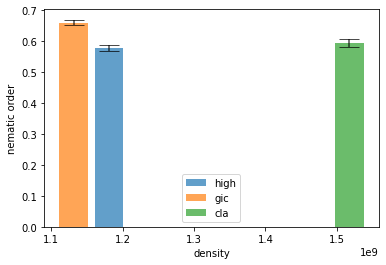

In [16]:
#compare nematic order in bar graph (with density)

for i in range(len(name)):
    den = density[i]
    nem = nematic[i]
    ci_s = cin[i]
    lsem = 1/(1/np.array(nem)-np.array(ci_s))-np.array(nem)
    usem = 1/(1/np.array(nem)+np.array(ci_s))-np.array(nem)
    
    plt.bar(den,nem,width=0.4*10**8,color='C'+str(i),label=name[i],alpha=0.7)
    plt.legend(loc='best')
    plt.errorbar(den,nem,yerr=[[-lsem],[usem]],ecolor='black',capsize=10,alpha=0.7)
    
plt.xlabel('density')
plt.ylabel('nematic order');

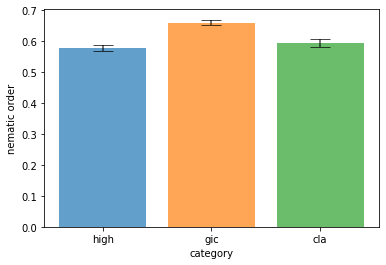

In [17]:
#compare nematic order in bar graph (without density)

for i in range(len(name)):
    nem = nematic[i]
    ci_s = cin[i]
    lsem = 1/(1/np.array(nem)-np.array(ci_s))-np.array(nem)
    usem = 1/(1/np.array(nem)+np.array(ci_s))-np.array(nem)
    
    plt.bar(i,nem,color='C'+str(i),alpha=0.7)
    plt.errorbar(i,nem,yerr=[[-lsem],[usem]],ecolor='black',capsize=10,alpha=0.7)

plt.xlabel('category')
plt.ylabel('nematic order')
plt.xticks(np.arange(len(name)),name);